# Principal Component Analysis (PCA)

__Basic idea:__ <br>
PCA can be described as the coordination transformation from arbitrary axes to a set of axes aligned with the data data. <br>
Principal component analysis (PCA) is used to reduce the dimensionality of the dataset at the expense of information loss. However the power of PCA comes from the computation of principal components and their selection based on the their ability to explain the variance of dataset. Where the principal components are computed using the linear combinations of features of original dataset. <br>
PCA may be used as preprocessing step to prepare a dataset for machine learning or to analyze or visualize the dataset. 

__Processing steps:__ <br>
-  Compute the covariance matrix of the dataset. <br>
-  Compute the eigen values and eigen vetor of covariance matrix. <br>
-  Sort thr eigen vectors in descencding order. <br>
-  Use these eigen vectors to project the data on the lower dimensionality. <br>

__Example#1:__

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Data generation
N = 100 
x = np.random.normal(size=N) #sample the data from gaussian/normal distribution
y = 0.5*x + 0.2*(np.random.normal(size=N))

# Plot the data
fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers', 
                marker=dict(size=8,opacity=0.7), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y",
    yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

__Step#1__ <BR>
$Cov(x,y)=\frac{1}{N-1}\Sigma_{j=1}^N(x_j - \mu_x)(y_j - \mu_y)$

In [28]:
data = np.stack((x,y), axis=1) # combining the data to form a 2D array
print("Data Shape:",data.shape)
#Computing the covariance matrix
cov = np.cov(data.T) # Transpose the data becuse the numpy requires the data in rows rather than in columns
print("Covariance matrix:\n", cov)

Data Shape: (100, 2)
Covariance matrix:
 [[0.86965687 0.42652019]
 [0.42652019 0.24316235]]


__Generating 3D data__

In [29]:
z = -.5*x + 2*np.random.uniform(size=N)
data = np.stack((x,y,z), axis=1) #.T
print("data.shape:",data.shape)
cov = np.cov(data.T)
print("covariance matrix:\n",cov)

# Plot our data
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers', marker=dict(size=5,opacity=0.7), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

data.shape: (100, 3)
covariance matrix:
 [[ 0.86965687  0.42652019 -0.41366339]
 [ 0.42652019  0.24316235 -0.20816768]
 [-0.41366339 -0.20816768  0.53530807]]


__Step#2:__ <br>
Eigenvectors: <br>
$ \textbf{A} \overrightarrow{v_i}=\lambda\overrightarrow{v_i}$

In [30]:
from numpy import linalg as LA
E_val, E_vect = LA.eig(cov)
print('Eigen values:\n', E_val)
print('Eigen vectors:\n', E_vect)

Eigen values:
 [1.34911545 0.27179761 0.02721423]
Eigen vectors:
 [[-0.77560876 -0.43942616 -0.45313982]
 [-0.39221081 -0.22698033  0.89143178]
 [ 0.49457227 -0.86912863 -0.00370024]]


__Step#3:__<br>
Sorting the eigen vectors

In [31]:
#Sort the eigen values and the eigen vectors in descending order
Sor_E_val, Sor_E_vect = zip(*sorted(zip(list(E_val), list(E_vect.T)),key=lambda x: x[0], reverse=True))
Sor_Eg_vect=np.array(Sor_E_vect).T #Convert the tuple back to array
print('Sorted Eigen values:\n', Sor_E_val)
print('Sorted Eigen vectors:\n', Sor_Eg_vect)

Sorted Eigen values:
 (1.3491154490500339, 0.2717976060314787, 0.027214232749132157)
Sorted Eigen vectors:
 [[-0.77560876 -0.43942616 -0.45313982]
 [-0.39221081 -0.22698033  0.89143178]
 [ 0.49457227 -0.86912863 -0.00370024]]


__Eigen vectors of 3D data:__

In [32]:
# Re-plot our data
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers',  
        marker=dict(size=8,opacity=0.5), name="data" ) ])

# Draw some extra 'lines' showing eigenvector directions
n_point = 50    # the lines will be made of lots of dots in a line
point_size= 3    # size of balls
t = np.linspace(0,1,num=n_point)  # parameterizer for drawing along vec directions

for i in range(3):   # do this for each eigenvector 
    # Uncomment the next line to scale (unit) vector by size of the eigenvalue
    # vs[:,i] *= lambdas[i] 
    ex, ey, ez = t*Sor_Eg_vect[0,i], t*Sor_Eg_vect[1,i],  t*Sor_Eg_vect[2,i]
    fig.add_trace(go.Scatter3d(x=ex, y=ey, z=ez,mode='markers',
                marker=dict(size=point_size,opacity=0.8), name="v_"+str(i+1)))

fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

__Step#4:__
Project the data

In [33]:
# Lets first dive in what is meant by the projection
proj_cov = Sor_Eg_vect.T @ cov @ Sor_Eg_vect   # project the covariance matrix, using eigenvectors
print("Projected covariance matrix:\n", proj_cov)

Projected covariance matrix:
 [[ 1.34911545e+00  2.82193313e-18  1.09783649e-16]
 [-9.36372939e-17  2.71797606e-01 -7.68415537e-18]
 [ 1.23342511e-16  1.68319803e-17  2.72142327e-02]]


In [34]:
#What is meant by that?
proj_cov[np.abs(proj_cov) < 1e-15] = 0
print("Cleaned up for intuation:\n", proj_cov)

Cleaned up for intuation:
 [[1.34911545 0.         0.        ]
 [0.         0.27179761 0.        ]
 [0.         0.         0.02721423]]


In [35]:
print('Print the shape of original data:', data.shape)

Print the shape of original data: (100, 3)


In [36]:
print("\n Rotating all the data to new coordinate system:")

proj_data = data @ Sor_Eg_vect  # project all the data 
print("\n Checking the shape of projected data =",proj_data.shape)
print("\n New covariance matrix = \n",np.cov(proj_data.T) )


 Rotating all the data to new coordinate system:

 Checking the shape of projected data = (100, 3)

 New covariance matrix = 
 [[ 1.34911545e+00 -6.60675643e-17  1.02050803e-16]
 [-6.60675643e-17  2.71797606e-01 -6.44125606e-17]
 [ 1.02050803e-16 -6.44125606e-17  2.72142327e-02]]


In [37]:
print("\n Reduce the dimensionality by dropping the last eigen vector:")

new_E_vect = Sor_Eg_vect[:,0:2]  # keep only the first and 2nd eigenvectors 
print("\n New shape of the eigen vectors = ",new_E_vect.shape) 
new_data_proj = data @ new_E_vect   # project the data to 2D
print("\n Checking the shape of reduced dimensionality data",new_data_proj.shape)
print("\n New covariance matrix in projected space = \n",np.cov(new_data_proj.T) )


 Reduce the dimensionality by dropping the last eigen vector:

 New shape of the eigen vectors =  (3, 2)

 Checking the shape of reduced dimensionality data (100, 2)

 New covariance matrix in projected space = 
 [[ 1.34911545e+00 -6.60675643e-17]
 [-6.60675643e-17  2.71797606e-01]]


In [38]:
# Difference between full and reduced dimensionality data
diff = proj_data[:,0:2] - new_data_proj
print("\n Absolute maximum difference between the two methods = ",np.max(np.abs(diff)))


 Absolute maximum difference between the two methods =  0.0


# Beyond 3D

# __Handwritten Digits:__ <br>
Now lets try to get something bigger to work on.... 

Shape of data: (1797, 64) 
Shape of target variables: (1797,)
This is supposed to be a '0':


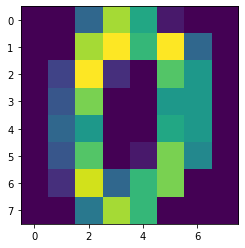

This is supposed to be a '1':


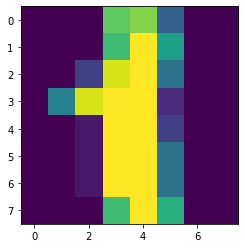

This is supposed to be a '2':


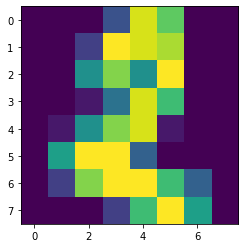

This is supposed to be a '3':


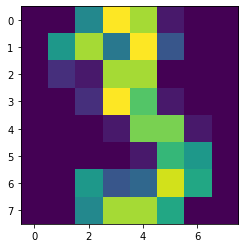

This is supposed to be a '4':


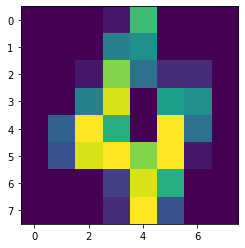

This is supposed to be a '5':


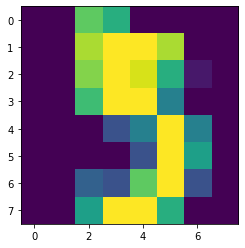

This is supposed to be a '6':


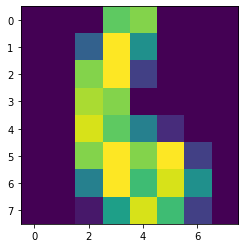

This is supposed to be a '7':


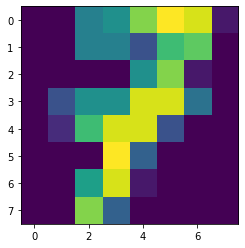

This is supposed to be a '8':


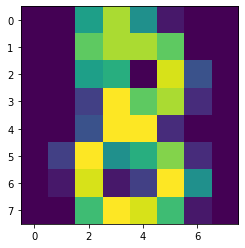

This is supposed to be a '9':


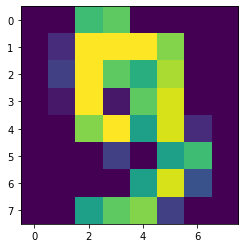

In [39]:
from sklearn.datasets import load_digits #import handwritten digit data from the library
digits  = load_digits()
X = digits.data / 255.0 
Y = digits.target
print("Shape of data:", X.shape, "\nShape of target variables:", Y.shape)

# Let's look a a few examples
for i in range(10):  # show 3 examples 
    print("This is supposed to be a '",Y[i],"':",sep="")
    plt.imshow(X[i].reshape([8,8]))
    plt.show()

__To do:__
-  Compute the covariance matrix of the data
-  Compute the eigen values of the matrix
-  project the data using first two PCs
-  Plot the data and discuss the results <br>
Repeat the above steps but increase the number of PCs to 3 


In [40]:
covar = np.cov(X.T)
covar

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.26566320e-05,  3.69241826e-05, ...,
        -2.45898188e-06,  1.51502080e-06, -1.13897452e-06],
       [ 0.00000000e+00,  3.69241826e-05,  3.47687405e-04, ...,
        -1.77691708e-05,  2.17152743e-05,  1.12246132e-05],
       ...,
       [ 0.00000000e+00, -2.45898188e-06, -1.77691708e-05, ...,
         5.35445573e-04,  2.40654278e-04,  4.42227246e-05],
       [ 0.00000000e+00,  1.51502080e-06,  2.17152743e-05, ...,
         2.40654278e-04,  2.57325367e-04,  7.25995522e-05],
       [ 0.00000000e+00, -1.13897452e-06,  1.12246132e-05, ...,
         4.42227246e-05,  7.25995522e-05,  5.32111161e-05]])

In [41]:
covar.shape

(64, 64)

In [43]:
eig_val, eig_vec = LA.eig(covar)
eig_val, eig_vec

(array([2.75289397e-03, 2.51776620e-03, 2.18052194e-03, 1.55479239e-03,
        1.06902215e-03, 9.09012301e-04, 7.97916788e-04, 6.76895143e-04,
        6.19930723e-04, 5.69193363e-04, 4.38585793e-04, 4.20164088e-04,
        3.36816427e-04, 3.27940893e-04, 2.71229869e-04, 2.60620744e-04,
        2.43773778e-04, 2.30749100e-04, 1.88150299e-04, 1.67425749e-04,
        1.64453153e-04, 1.47367901e-04, 1.41890082e-04, 1.33646578e-04,
        1.28652240e-04, 1.10200378e-04, 1.06416591e-04, 9.52396014e-05,
        9.05035175e-05, 7.92905328e-05, 6.90703047e-05, 6.53114647e-05,
        6.22443495e-05, 6.06444190e-05, 5.70007298e-05, 5.43122347e-05,
        4.74367411e-05, 4.21038065e-05, 4.10935633e-05, 3.90881296e-05,
        3.51093801e-05, 2.93309079e-05, 2.79456470e-05, 2.59894562e-05,
        2.15605105e-05, 1.98726472e-05, 1.78229018e-05, 1.43209536e-05,
        1.03014317e-05, 7.47505140e-06, 3.88082172e-06, 1.52484113e-06,
        9.70869431e-07, 9.34067791e-07, 6.10015067e-07, 2.299202

In [46]:
sort_e_val, sort_e_vec = zip(*sorted(zip(list(eig_val), list(eig_vec.T)) ,key=lambda x: x[0], reverse=True))

In [57]:
Sor_Eg_vect =np.array(sort_e_vec)
Sor_E_val =np.array(sort_e_val)
Sor_E_val

array([2.75289397e-03, 2.51776620e-03, 2.18052194e-03, 1.55479239e-03,
       1.06902215e-03, 9.09012301e-04, 7.97916788e-04, 6.76895143e-04,
       6.19930723e-04, 5.69193363e-04, 4.38585793e-04, 4.20164088e-04,
       3.36816427e-04, 3.27940893e-04, 2.71229869e-04, 2.60620744e-04,
       2.43773778e-04, 2.30749100e-04, 1.88150299e-04, 1.67425749e-04,
       1.64453153e-04, 1.47367901e-04, 1.41890082e-04, 1.33646578e-04,
       1.28652240e-04, 1.10200378e-04, 1.06416591e-04, 9.52396014e-05,
       9.05035175e-05, 7.92905328e-05, 6.90703047e-05, 6.53114647e-05,
       6.22443495e-05, 6.06444190e-05, 5.70007298e-05, 5.43122347e-05,
       4.74367411e-05, 4.21038065e-05, 4.10935633e-05, 3.90881296e-05,
       3.51093801e-05, 2.93309079e-05, 2.79456470e-05, 2.59894562e-05,
       2.15605105e-05, 1.98726472e-05, 1.78229018e-05, 1.43209536e-05,
       1.03014317e-05, 7.47505140e-06, 3.88082172e-06, 1.52484113e-06,
       9.70869431e-07, 9.34067791e-07, 6.10015067e-07, 2.29920239e-07,
      

In [56]:
# Re-plot our data
fig = go.Figure(data=[go.Scatter3d(x=X, y=Y, z=z,mode='markers',  
        marker=dict(size=8,opacity=0.5), name="data" ) ])

# Draw some extra 'lines' showing eigenvector directions
n_point = 50    # the lines will be made of lots of dots in a line
point_size= 3    # size of balls
t = np.linspace(0,1,num=n_point)  # parameterizer for drawing along vec directions

for i in range(len(sort_e_val)):   # do this for each eigenvector 
    # Uncomment the next line to scale (unit) vector by size of the eigenvalue
    # vs[:,i] *= lambdas[i] 
    ex, ey, ez = t*Sor_Eg_vect[0,i], t*Sor_Eg_vect[1,i],  t*Sor_Eg_vect[2,i]
    fig.add_trace(go.Scatter3d(x=ex, y=ey, z=ez,mode='markers',
                marker=dict(size=point_size,opacity=0.8), name="v_"+str(i+1)))

fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()